In [1]:
import sys
sys.path.append("../..")
from thesis.utils.env_checker import RewardCheck
from thesis.envs.matrix import Matrix
import json

In [2]:
from thesis.utils.utils import setup_ray, save, load, Experiment
path = "D:/Master/Masterarbeit/thesis"
setup_ray(path = path, unidirectional = False, seed=69)

2023-05-25 23:53:08,410	INFO worker.py:1528 -- Started a local Ray instance.


In [12]:
def get_env(fleetsize):
    return Matrix(
        model_path = "../../envs/Matrix.zip",
        startport = 51142,
        max_seconds = 60*60,

        fleetsize = fleetsize,
        max_fleetsize = 20,    
        pseudo_routing = False,
        routing_policy = "../../models/matrix_routing/10_final6_8_20_2023-05-23_16-51-21/checkpoint_001800/policies/agv",
        pseudo_dispatcher = False,
        dispatching_policy = ["../../models/matrix_together/02_pretrained_8_20_2023-05-24_22-28-05/checkpoint_000250/policies/dispatcher1", "../../models/matrix_together/02_pretrained_8_20_2023-05-24_22-28-05/checkpoint_000250/policies/dispatcher2"],
        pseudo_dispatcher_clever=True,
        #pseudo_dispatcher_distance = 0.2,
        routing_agent_death= True,
        death_on_target = True,
        transform_dispatching_partobs=True,
        direction_reward = -0.1,
        sim_config = dict(
            dispatch = True,
            routing_ma = True,
            dispatching_ma = True,
            reward_reached_target = 0,
            #reward_reached_target_by_time = True, 
            reward_wrong_target = 0,
            reward_removed_for_block = 0, 
            reward_target_distance = 0,
            reward_invalid= 0,
            reward_duration = -0.5,
            block_timeout = 120,
            station_separate = False,
            reward_accepted_in_station = 2,
            reward_declined_in_station = -1,
            #reward_part_completed = 5,
            #reward_geo_operation=1,
            #reward_rework_operation=1,
            #reward_respot_operation=1,
            reward_reduce = -0.02,
            #reward_balance = -5,
            routing_interval = 2,
            dispatching_interval=3700,
            io_quote = 0.9  ,
            availability = 0.9,
            mttr = 5,
            fixed_fleets = True,
        )
    )

In [13]:
results = {}
for f in range(8, 22, 4):
    chk = RewardCheck(get_env(f))
    result_seed = {}
    for seed in range(10):
        chk.run(1, seed)
        result_seed[seed] = chk.env.statistics
    results[f] = result_seed
    del chk
    with open("../../logs/fleetsize_fin_learn_v2.json", "w") as fp:
        json.dump(results , fp) 

2023-05-26 00:03:13,477	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-05-26 00:03:13,548	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-05-26 00:03:13,557	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-05-26 00:03:13,617	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-05-26 00:03:13,619	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-05-26 00:03:13,622	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
2023-05-26 00:03:14,212	INFO ppo_tf_policy.py:41 -- `vf_share_layers=True` in your model. Therefore, remember to tune the value of

KeyboardInterrupt: 

In [4]:
chk = RewardCheck(get_env(4))

c:\Users\Wegma\.conda\envs\thesis3_9\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_61303_lmo2sfiu)
  warn(f"Unzipping to temporary directory ({tmp_dir})")


AGENT 1000 --- STEP 142 --- REWARD 5.840000000000003


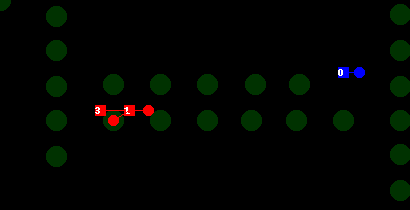

15-(1.0, 0.07228915662650602)

21-(0.8582677165354331, 0.18072289156626506)

22-(0.8582677165354331, 0.24096385542168675)

23-(0.8582677165354331, 0.30120481927710846)

24-(0.8582677165354331, 0.3614457831325301)

25-(0.8582677165354331, 0.42168674698795183)

26-(0.14173228346456693, 0.08433734939759036)

None


ValueError: invalid literal for int() with base 10: ''

In [5]:
chk.run(1, 42,manual_agents=["1000"], dispatch_mode=True)

In [6]:
chk.env.statistics #pseudo

{'block': 2.0,
 'targetReached': 140.0,
 'wrongTarget': 6.0,
 'jobDone': 1.0,
 'notArrived': 5.0,
 'dispatch': 143.0,
 'newPart': 3.0,
 'taken_invalid': 314.0,
 'passed': 14.0,
 '_blocksec_agv1': 11.000000000000007,
 '_jobdur_hgeo1': 70.0,
 '_jobnum_hgeo1': 1.0,
 '_jobdur_vgeo1': 140.0,
 '_jobnum_vgeo1': 2.0,
 '_njobs_agv0': 14.0,
 '_blocksec_agv3': 1.5,
 '_jobdur_wps_1': 81.375,
 '_jobnum_wps_1': 3.0,
 '_jobdur_hsn2_2': 58.5,
 '_jobnum_hsn2_2': 2.0,
 '_blocksec_agv2': 4.5,
 '_jobdur_vgeo2': 70.0,
 '_jobnum_vgeo2': 1.0,
 '_jobdur_vgeo3': 70.0,
 '_jobnum_vgeo3': 1.0,
 '_jobdur_vgeo4': 70.0,
 '_jobnum_vgeo4': 1.0,
 '_jobdur_fls_2': 9.0,
 '_jobnum_fls_2': 1.0,
 '_jobdur_hsn1_1': 15.125,
 '_jobnum_hsn1_1': 1.0,
 '_jobdur_impact': 15.0,
 '_jobnum_impact': 1.0,
 '_jobdur_vgeo5': 70.0,
 '_jobnum_vgeo5': 1.0,
 '_jobdur_fls_1': 9.0,
 '_jobnum_fls_1': 1.0,
 '_jobdur_vgeo6': 70.0,
 '_jobnum_vgeo6': 1.0,
 'run_time': 1413.5,
 'liveLock': 2.0,
 'fleetsize': 4}

In [6]:
env.statistics #trained

{'block': 8.0,
 'targetReached': 142.0,
 'wrongTarget': 6.0,
 'jobDone': 2.0,
 'dispatch': 232.0,
 'newPart': 11.0,
 'taken_invalid': 4616.0,
 'passed': 1788.0,
 '_blocksec_agv8': 70.5,
 '_blocksec_agv3': 1.0,
 '_blocksec_agv6': 84.5,
 'liveLock': 68.0,
 '_blocksec_agv10': 74.5,
 '_blocksec_agv0': 287.0,
 '_blocksec_agv7': 2.5,
 '_jobdur_hgeo1': 140.0,
 '_jobnum_hgeo1': 2.0,
 '_jobdur_vgeo1': 630.0,
 '_jobnum_vgeo1': 9.0,
 '_njobs_agv0': 22.0,
 '_blocksec_agv4': 779.5000000000001,
 '_jobdur_vgeo2': 560.0,
 '_jobnum_vgeo2': 8.0,
 '_njobs_agv2': 21.0,
 '_jobdur_hsn2_2': 292.5,
 '_jobnum_hsn2_2': 10.0,
 '_njobs_agv6': 10.0,
 '_jobdur_rework': 0.0,
 '_jobnum_rework': 5.0,
 '_njobs_agv4': 10.0,
 '_jobdur_wps_1': 198.625,
 '_jobnum_wps_1': 8.0,
 '_njobs_agv8': 6.0,
 '_jobdur_wps_3': 147.875,
 '_jobnum_wps_3': 6.0,
 '_jobdur_vgeo3': 560.0,
 '_jobnum_vgeo3': 8.0,
 '_njobs_agv10': 5.0,
 '_jobdur_vgeo4': 560.0,
 '_jobnum_vgeo4': 8.0,
 '_jobdur_fls_2': 63.0,
 '_jobnum_fls_2': 7.0,
 '_blocksec_agv

In [7]:
env.statistics #trained full

{'block': 18.0,
 'targetReached': 390.0,
 'wrongTarget': 1.0,
 'jobDone': 9.0,
 'dispatch': 394.0,
 'newPart': 19.0,
 '_blocksec_agv5': 431.5,
 '_blocksec_agv7': 948.5,
 '_blocksec_agv3': 820.0,
 'passed': 7.0,
 'taken_invalid': 70.0,
 '_blocksec_agv0': 461.5,
 '_jobdur_hgeo1': 630.0,
 '_jobnum_hgeo1': 9.0,
 '_jobdur_vgeo1': 700.0,
 '_jobnum_vgeo1': 10.0,
 'liveLock': 52.0,
 '_njobs_agv2': 31.0,
 '_jobdur_hsn2_2': 497.25,
 '_jobnum_hsn2_2': 17.0,
 '_njobs_agv6': 27.0,
 '_njobs_agv4': 22.0,
 '_jobdur_vgeo2': 630.0,
 '_jobnum_vgeo2': 9.0,
 '_blocksec_agv2': 335.0,
 '_blocksec_agv1': 963.0,
 '_njobs_agv0': 22.0,
 '_jobdur_hsn1_2': 589.875,
 '_jobnum_hsn1_2': 22.0,
 '_blocksec_agv6': 298.0,
 '_blocksec_agv4': 262.5,
 '_jobdur_vgeo3': 560.0,
 '_jobnum_vgeo3': 8.0,
 '_jobdur_wps_1': 467.25,
 '_jobnum_wps_1': 15.0,
 '_njobs_agv5': 21.0,
 '_jobdur_fls_1': 288.0,
 '_jobnum_fls_1': 22.0,
 '_njobs_agv3': 18.0,
 '_njobs_agv1': 20.0,
 '_njobs_agv7': 20.0,
 '_jobdur_vgeo4': 560.0,
 '_jobnum_vgeo4': 

In [ ]:
#env.statistics

In [ ]:
#chk.replay("0")

In [ ]:
#env.observations["1000"]

In [ ]:
# import numpy as np
# np.array(["Hi",2,3])[[True, False, True]]

In [ ]:
vgeo1
vgeo2
vgeo3
vgeo4
vgeo5
vgeo6
hgeo1
hgeo2
hgeo3
hgeo4
hgeo5

NameError: name 'vgeo1' is not defined

In [ ]:
env.agent_hive.stations

OrderedDict([(4, (0.15384615384615385, 0.5229357798165137)),
             (9, (0.15384615384615385, 0.3486238532110092)),
             (14, (0.2875739644970414, 0.6146788990825688)),
             (19, (0.4, 0.44036697247706424)),
             (24, (0.5183431952662721, 0.6146788990825688)),
             (29, (0.6366863905325444, 0.44036697247706424)),
             (34, (0.7550295857988165, 0.6146788990825688)),
             (39, (0.8733727810650888, 0.6146788990825688)),
             (40, (0.7550295857988165, 0.44036697247706424)),
             (41, (0.6366863905325444, 0.6146788990825688)),
             (42, (0.5183431952662721, 0.44036697247706424)),
             (43, (0.4, 0.6146788990825688)),
             (44, (0.2875739644970414, 0.44036697247706424)),
             (49, (0.15384615384615385, 0.7064220183486238)),
             (54, (0.15384615384615385, 0.8899082568807339)),
             (59, (0.15384615384615385, 0.1559633027522936)),
             (76, (1.0, 0.08256880733944955)),

AGENT 1000 --- STEP 1 --- ACTION [4, 4, 5, 2, 4, 4, 1, 5, 5, 3] --- REWARD -5.0


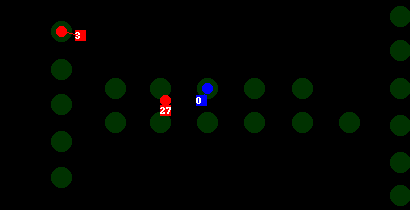

In [ ]:
chk.replay("1000")

In [ ]:
chk.plot("0")

KeyboardInterrupt: 

In [ ]:
chk.history["statistics"]

[{'block': 0.0,
  'targetReached': 152.0,
  'wrongTarget': 9.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 155.0,
  'taken_invalid': 498.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 236.5,
  '_jobnum_hsn1_1': 2.0,
  '_blocksec_agv1': 97.5,
  '_jobdur_wps_1': 217.0,
  '_jobnum_wps_1': 1.0,
  '_jobdur_hsn2_2': 130.0,
  '_jobnum_hsn2_2': 1.0,
  '_njobs_agv1': 3.0,
  '_jobdur_impact': 300.0,
  '_jobnum_impact': 2.0,
  '_njobs_agv0': 1.0},
 {'block': 0.0,
  'targetReached': 133.0,
  'wrongTarget': 5.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 137.0,
  'taken_invalid': 329.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_blocksec_agv1': 218.0,
  '_blocksec_agv0': 0.5,
  '_njobs_agv0': 6.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 137.5,
  '_jobnum_hsn1_1': 1.0,
  '_jobdur_hsn1_2': 198.0,
  '_jobnum_hsn1_2': 2.0,
  '_njobs_a

In [ ]:
[stat["block"] for stat in chk.history["statistics"]]

[0.0, 0.0, 0.0, 0.0, 0.0]